In [28]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *

In [29]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()

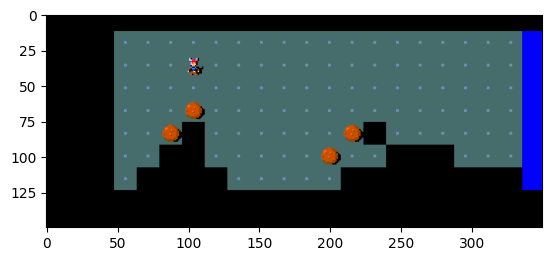

In [30]:
plt.imshow(state['pixel'][100:250, 400:750]) # Immagine ristretta con range [y][x]

Current river target:  (11, 46) 125 46


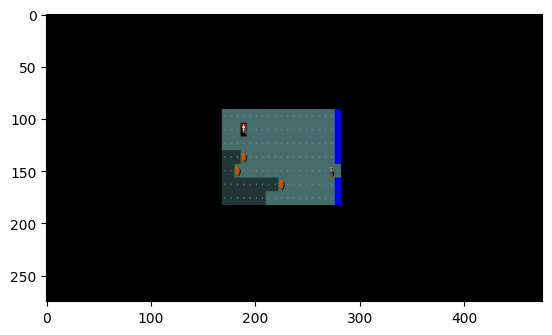

In [31]:
obs, current_river_target = push_one_boulder_into_river(state, env)
print("Current river target: ", current_river_target, ord("}"), obs['chars'][current_river_target])
while obs['chars'][current_river_target] == ord("}"):
    obs, current_river_target = push_one_boulder_into_river(obs, env)

In [32]:
game_map = obs['chars']
game_gui = obs['pixel']

# Step into the river

In [33]:
player_pos = get_player_location(game_map)
action, name = action_map(player_pos, current_river_target)
obs, _,_,_ = env.step(action)

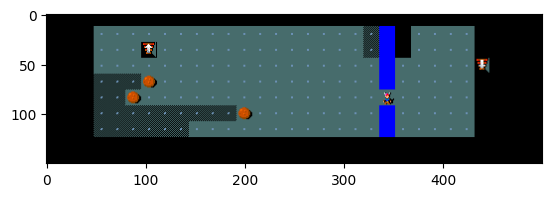

In [34]:
plt.imshow(obs['pixel'][100:250, 400:900]) # Immagine ristretta con range [y][x]

# Agent to Exit

In [35]:
game_map = obs['chars']
game_gui = obs['pixel']

player_pos = get_player_location(game_map)
exit_pos = get_exit_location(game_map)

Rewards: 
0.0
0.0
0.0
0.0
0.0
1.0
Total reward:  1.0


[(11, 47), (11, 48), (11, 49), (11, 50), (10, 51), None]

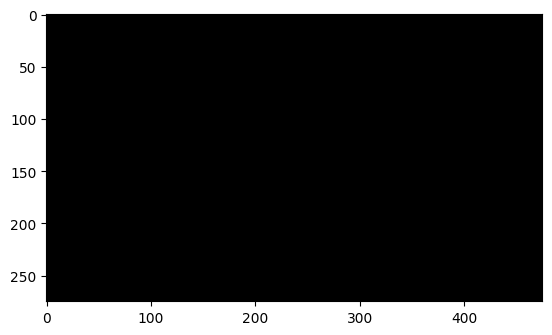

In [36]:
path_to_exit = a_star(game_map, player_pos, exit_pos, False, False, get_optimal_distance_point_to_point)
actions_to_exit,names = actions_from_path(player_pos, path_to_exit[1:])
plot_animated_sequence(env, game_gui, game_map, actions_to_exit)